# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, MinMaxScaler
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
financial = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [5]:
sample_financial = financial.sample(n=100000)
sample_financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4116394,302,PAYMENT,10713.74,C2108747311,0.00,0.00,M1741414056,0.00,0.00,0,0
1658484,158,PAYMENT,5572.77,C873991644,672938.43,667365.66,M1376736209,0.00,0.00,0,0
5160837,357,PAYMENT,10284.63,C252131657,20619.00,10334.37,M993427212,0.00,0.00,0,0
935767,43,CASH_OUT,189390.35,C1659027639,0.00,0.00,C808904348,6444744.36,6634134.71,0,0
4961379,351,CASH_OUT,76731.72,C954829458,0.00,0.00,C1896395958,838426.87,915158.59,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5618022,395,TRANSFER,1409050.12,C1128563908,0.00,0.00,C1627551181,6310069.86,7719119.98,0,0
4792371,345,CASH_OUT,191997.11,C1097259206,0.00,0.00,C212075695,2541763.97,2733761.08,0,0
5719272,398,PAYMENT,53549.35,C1783114919,0.00,0.00,M96834927,0.00,0.00,0,0
5469004,379,CASH_OUT,212481.51,C947804496,271.00,0.00,C200627857,89831.21,302312.72,0,0


### What is the distribution of the outcome? 

In [9]:
sample_financial.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [17]:
sample_financial.isFraud.value_counts()

0    99868
1      132
Name: isFraud, dtype: int64

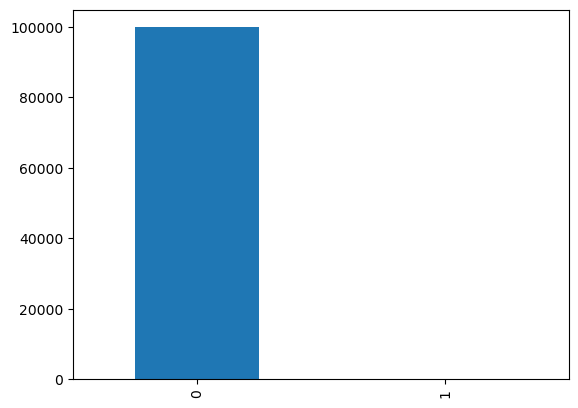

In [18]:
pd.value_counts(sample_financial['isFraud']).plot(kind = 'bar')
plt.show()

In [20]:
sample_financial["type"].value_counts()

CASH_OUT    35055
PAYMENT     33830
CASH_IN     22089
TRANSFER     8384
DEBIT         642
Name: type, dtype: int64

In [24]:
sample_financial = pd.get_dummies(sample_financial, columns=['type'])
sample_financial.drop(['nameOrig','nameDest'], axis = 1, inplace=True)
sample_financial.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4116394,302,10713.74,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0
1658484,158,5572.77,672938.43,667365.66,0.00,0.00,0,0,0,0,0,1,0
5160837,357,10284.63,20619.00,10334.37,0.00,0.00,0,0,0,0,0,1,0
935767,43,189390.35,0.00,0.00,6444744.36,6634134.71,0,0,0,1,0,0,0
4961379,351,76731.72,0.00,0.00,838426.87,915158.59,0,0,0,1,0,0,0


### Run a logistic regression classifier and evaluate its accuracy.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features = sample_financial.drop(labels='isFraud', axis=1)
target = sample_financial['isFraud']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.2)

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred = model.predict(X_test)

model.score(X_train,y_train)

0.99935

In [28]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[19963,     8],
       [    4,    25]])

### Now pick a model of your choice and evaluate its accuracy.

In [38]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(max_depth=5), 
    n_estimators=100,                   
    max_samples=5000,                      
    bootstrap = True)                   

bagging_reg.fit(X_train, y_train)
bagging_reg.score(X_test,y_test)

0.5306674456025794

### Which model worked better and how do you know?

In [2]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.